# Priprava podatkov

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dataset_nov.xls")
df.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Zhao, LH; Ren, JL; Zhang, L; Zhao, HB",NaN,NaN,NaN,"Zhao, Lihong; Ren, Jiaolong; Zhang, Lin; Zhao,...",NaN,NaN,Quantitative Analysis and Prediction of Academ...,SUSTAINABILITY,...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Environme...,Q3XI6,NaN,gold,NaN,NaN,2025-01-17,WOS:001056877800001,0
1,J,"Guanin-Fajardo, JH; Guaña-Moya, J; Casillas, J",NaN,NaN,NaN,"Guanin-Fajardo, Jorge Humberto; Guana-Moya, Ja...",NaN,NaN,Predicting Academic Success of College Student...,DATA,...,Emerging Sources Citation Index (ESCI),Computer Science; Science & Technology - Other...,OV3N6,NaN,"gold, Green Published",NaN,NaN,2025-01-17,WOS:001210016800001,0
2,J,"Xu, X; Wang, JZ; Peng, H; Wu, RL",NaN,NaN,NaN,"Xu, Xing; Wang, Jianzhong; Peng, Hao; Wu, Ruilin",NaN,NaN,Prediction of academic performance associated ...,COMPUTERS IN HUMAN BEHAVIOR,...,Social Science Citation Index (SSCI),Psychology,ID0EC,NaN,NaN,NaN,NaN,2025-01-17,WOS:000471355500018,0
3,J,"Raji, NR; Kumar, RMS; Biji, CL",NaN,NaN,NaN,"Raji, N. R.; Kumar, R. Mathusoothana S.; Biji,...",NaN,NaN,Explainable Machine Learning Prediction for th...,IEEE ACCESS,...,Science Citation Index Expanded (SCI-EXPANDED),Computer Science; Engineering; Telecommunications,IC1G4,NaN,gold,NaN,NaN,2025-01-17,WOS:001164026800001,0
4,J,"Contreras-Bravo, LE; Nieves-Pimiento, N; Guerr...",NaN,NaN,NaN,"Contreras-Bravo, Leonardo Emiro; Nieves-Pimien...",NaN,NaN,Prediction of University-Level Academic Perfor...,INGENIERIA,...,Emerging Sources Citation Index (ESCI),Engineering,8R0YA,NaN,gold,NaN,NaN,2025-01-17,WOS:000927623800004,0


In [2]:
# Count the number of publications in 2015 and 2025
count_2015 = (df['Publication Year'] == 2015).sum()
count_2025 = (df['Publication Year'] == 2025).sum()

# Remove rows where 'Publication Year' is 2015 or 2025
df = df[~df['Publication Year'].isin([2015, 2025])]

# Print results
print(f"Number of publications in 2015: {count_2015}")
print(f"Number of publications in 2025: {count_2025}")

Number of publications in 2015: 1
Number of publications in 2025: 4


In [3]:
# Checking for duplicates in the 'Article Title' column
duplicate_titles = df[df.duplicated(subset='Article Title', keep=False)]

# Count the number of duplicates
num_duplicates = len(duplicate_titles)

if num_duplicates > 0:
    print(f"Found {num_duplicates} duplicate entries based on 'Article Title'.")
    
    # Removing duplicates, keeping only the first occurrence
    df_cleaned = df.drop_duplicates(subset='Article Title', keep='first')
    
    # Number of entries removed
    entries_removed = len(df) - len(df_cleaned)
    print(f"{entries_removed} duplicate entries removed from the DataFrame.")
else:
    print("No duplicate entries found in the 'Article Title' column.")

# Updating the DataFrame after removing duplicates
df = df_cleaned if num_duplicates > 0 else df

Found 2 duplicate entries based on 'Article Title'.
1 duplicate entries removed from the DataFrame.


In [5]:
columns_to_save = ["Authors", "Article Title", "DOI", "DOI Link"]
df_analiza = df[columns_to_save]

# Filter out the row with the specific "Article Title" Because it has expression of concern
#df_analiza = df_analiza[df_analiza["Article Title"] != "Stacked KNN with hard voting predictive approach to assist hiring process in IT organizations (Publication with Expression of Concern)"]

# Save the filtered DataFrame to an Excel file
df_analiza.to_excel("df_analiza.xlsx", index=False)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\borbr\AppData\Local\Temp\ipykernel_10528\3647661147.py:4: SyntaxWarning: invalid escape sequence '\s'
  df['Publisher'] = df['Publisher'].str.replace('\s+', ' ', regex=True)


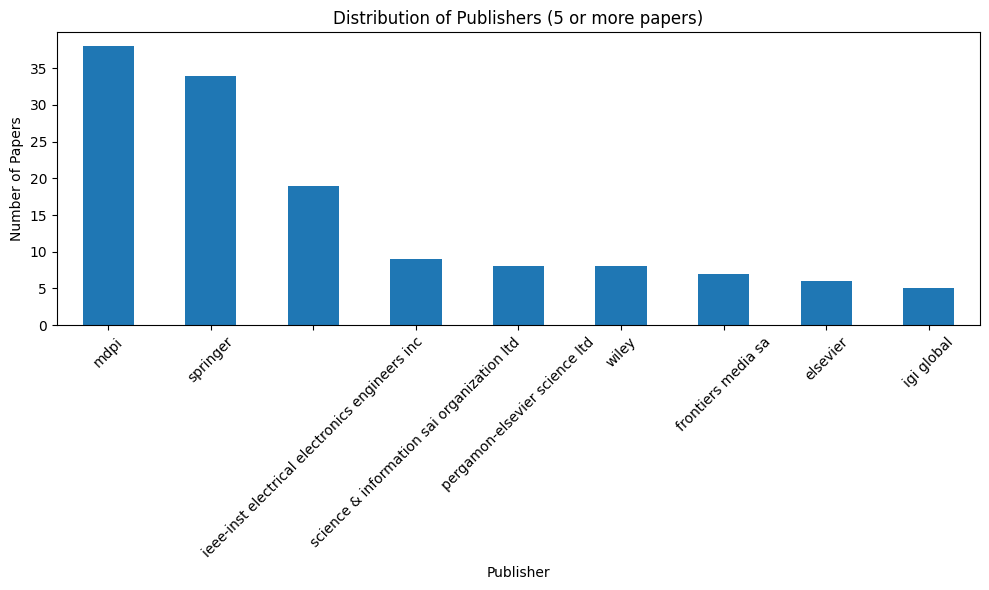

In [4]:
df['Publisher'] = df['Publisher'].str.strip().str.lower().replace('', 'unknown').fillna('unknown')

# 2. Replace non-breaking spaces or other special whitespace characters
df['Publisher'] = df['Publisher'].str.replace('\s+', ' ', regex=True)

# Calculate the counts of each publisher
publisher_counts = df['Publisher'].value_counts()

# Filter to include only publishers with 5 or more occurrences
filtered_publisher_counts = publisher_counts[publisher_counts >= 5]

# Plotting the distribution
plt.figure(figsize=(10, 6))
filtered_publisher_counts.plot(kind='bar')
plt.title('Distribution of Publishers (5 or more papers)')
plt.xlabel('Publisher')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Topic 1:
performance, learning, data, student, academic, students, model, prediction, educational, education
Topic 2:
students, performance, learning, academic, models, model, usepackage, prediction, study, based
Topic 3:
students, performance, learning, academic, machine, data, models, student, using, model
Topic 4:
learning, students, study, data, research, machine, performance, programming, prediction, education
Topic 5:
students, learning, student, academic, performance, data, study, models, machine, risk


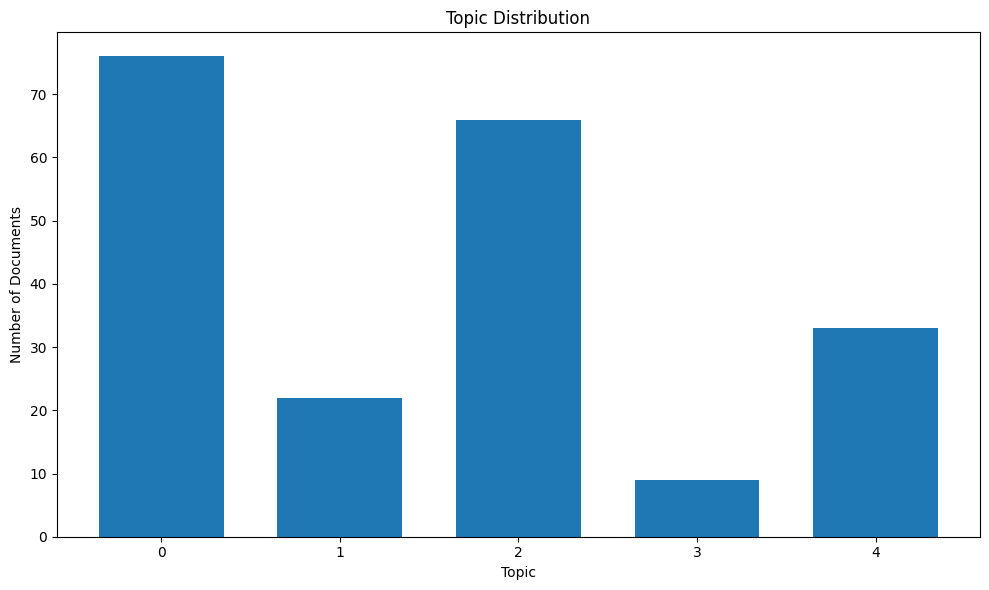

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Preprocess the 'Abstract' column: remove NaN, convert to lowercase, and strip whitespace
df['Abstract'] = df['Abstract'].dropna().str.lower().str.strip()

# Vectorization: Convert text to a document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(df['Abstract'])

# LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)

# Plotting the distribution of topics
topic_distribution = lda.transform(dtm)
topic_counts = topic_distribution.argmax(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(topic_counts, bins=range(lda.n_components + 1), align='left', rwidth=0.7)
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(range(lda.n_components))
plt.tight_layout()
plt.show()


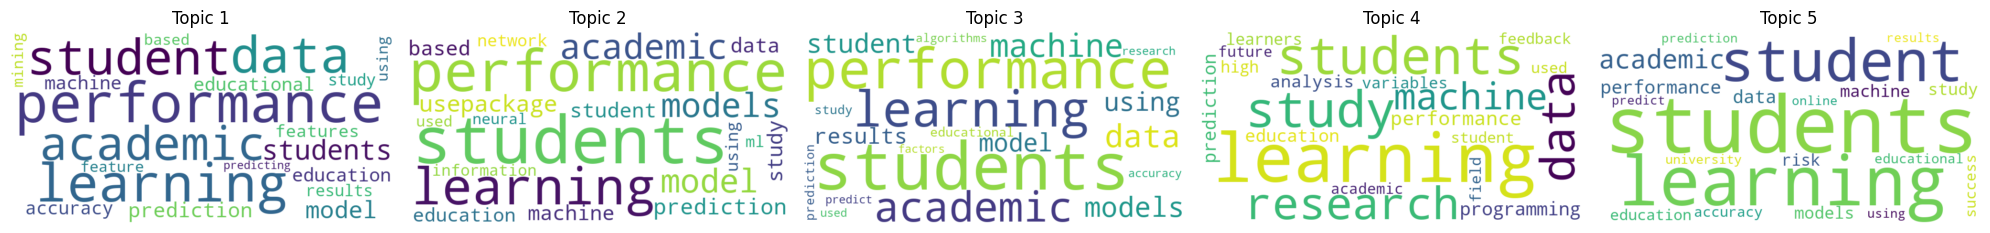

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocess the 'Abstract' column: remove NaN, convert to lowercase, and strip whitespace
df['Abstract'] = df['Abstract'].dropna().str.lower().str.strip()

# Vectorization: Convert text to a document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(df['Abstract'])

# LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Extracting topics
feature_names = vectorizer.get_feature_names_out()
no_top_words = 20

# Create a figure for the word clouds
fig, axes = plt.subplots(1, 5, figsize=(20, 8), sharex=True, sharey=True)

for topic_idx, topic in enumerate(lda.components_):
    top_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)
    
    ax = axes[topic_idx]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {topic_idx + 1}')

plt.tight_layout()
plt.show()


In [7]:
# Descriptive statistics for Cited Reference Count
cited_reference_stats = df['Cited Reference Count'].describe()
print(cited_reference_stats)


count    206.000000
mean      47.577670
std       20.929878
min        9.000000
25%       34.000000
50%       43.500000
75%       56.750000
max      143.000000
Name: Cited Reference Count, dtype: float64


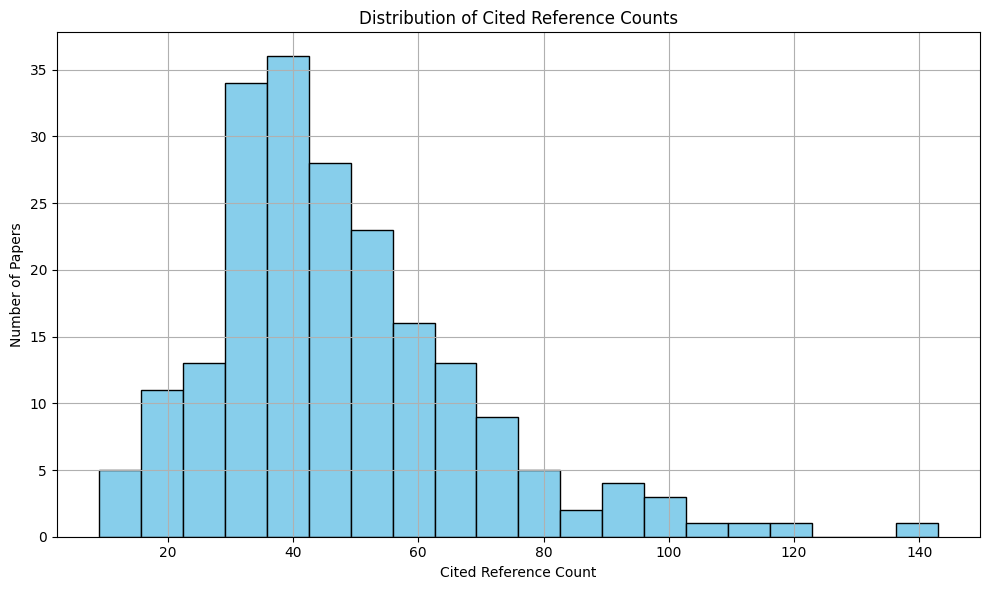

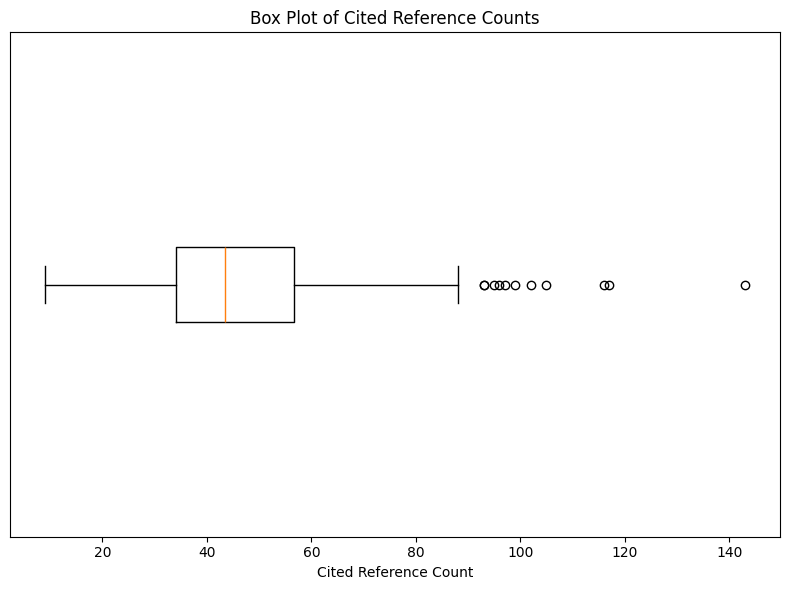

Average Cited Reference Count: 47.58
Standard Deviation of Cited Reference Count: 20.93


In [8]:
import matplotlib.pyplot as plt

# Histogram for Cited Reference Count
plt.figure(figsize=(10, 6))
plt.hist(df['Cited Reference Count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cited Reference Counts')
plt.xlabel('Cited Reference Count')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box plot for Cited Reference Count
plt.figure(figsize=(8, 6))
plt.boxplot(df['Cited Reference Count'].dropna(), vert=False)
plt.title('Box Plot of Cited Reference Counts')
plt.xlabel('Cited Reference Count')

# Removing the y-axis ticks and label
plt.yticks([])
plt.tight_layout()
plt.show()

# Calculate and output the average and standard deviation of the Cited Reference Count
average_cited_reference_count = df['Cited Reference Count'].mean()
std_cited_reference_count = df['Cited Reference Count'].std()

print(f"Average Cited Reference Count: {average_cited_reference_count:.2f}")
print(f"Standard Deviation of Cited Reference Count: {std_cited_reference_count:.2f}")


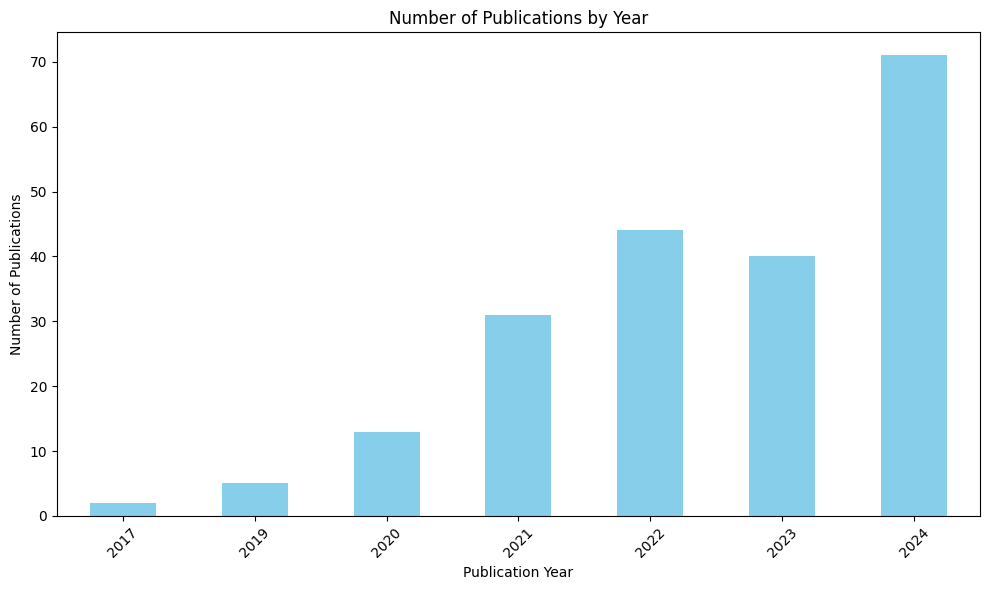

In [9]:
import matplotlib.pyplot as plt

# Count publications by year
publications_per_year = df['Publication Year'].value_counts().sort_index()

# Plotting the number of publications by year
plt.figure(figsize=(10, 6))
publications_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Publications by Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


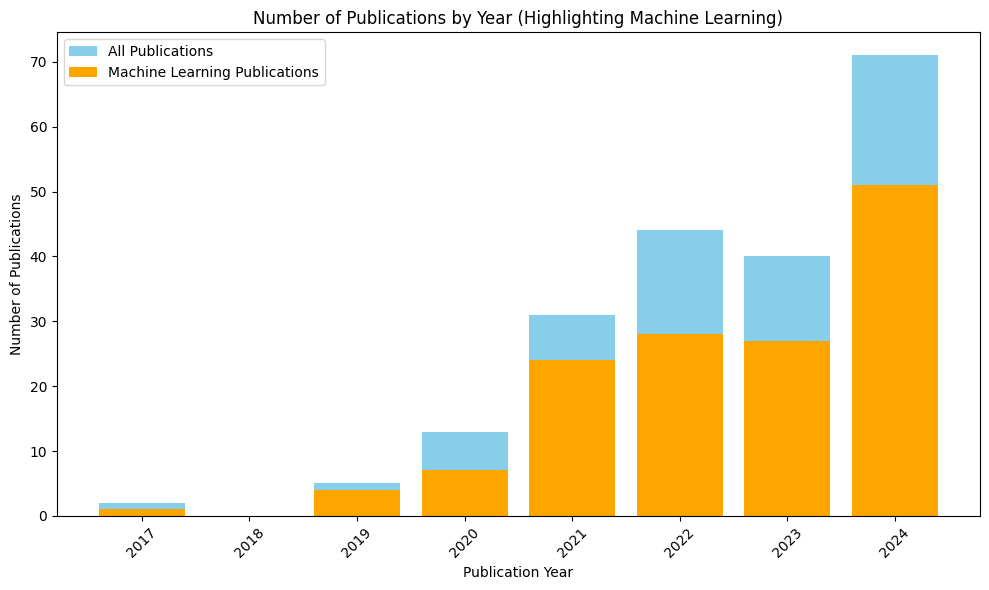

In [10]:
# Filter rows with 'machine learning' in 'Author Keywords'
df['Author Keywords'] = df['Author Keywords'].fillna('').str.lower()
ml_publications_per_year = df[df['Author Keywords'].str.contains('machine learning')]['Publication Year'].value_counts().sort_index()

# Plotting the advanced bar chart
plt.figure(figsize=(10, 6))

# Bar chart for all publications
plt.bar(publications_per_year.index, publications_per_year.values, color='skyblue', label='All Publications')

# Bar chart for publications with 'machine learning' keyword
plt.bar(ml_publications_per_year.index, ml_publications_per_year.values, color='orange', label='Machine Learning Publications')

plt.title('Number of Publications by Year (Highlighting Machine Learning)')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


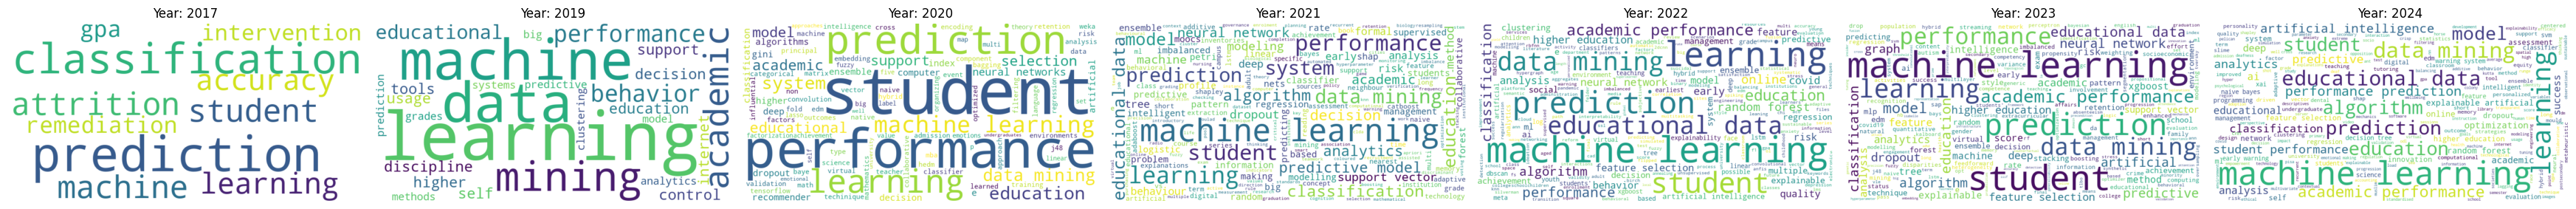

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Assuming 'df' is your DataFrame and it has columns 'Publication Year' and 'Author Keywords'

# Filter out the years 2015 and 2025
filtered_df = df[~df['Publication Year'].isin([2015, 2025])]

# Group data by 'Publication Year' and concatenate all author keywords for each year
year_keywords_dict = filtered_df.groupby('Publication Year')['Author Keywords'].apply(lambda x: ' '.join(x.dropna())).to_dict()

# Determine the number of unique years for subplot layout
num_years = len(year_keywords_dict)
fig, axes = plt.subplots(1, num_years, figsize=(5 * num_years, 5))

# Generate word cloud for each year and plot in the corresponding subplot
for i, (year, keywords) in enumerate(sorted(year_keywords_dict.items())):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Year: {year}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


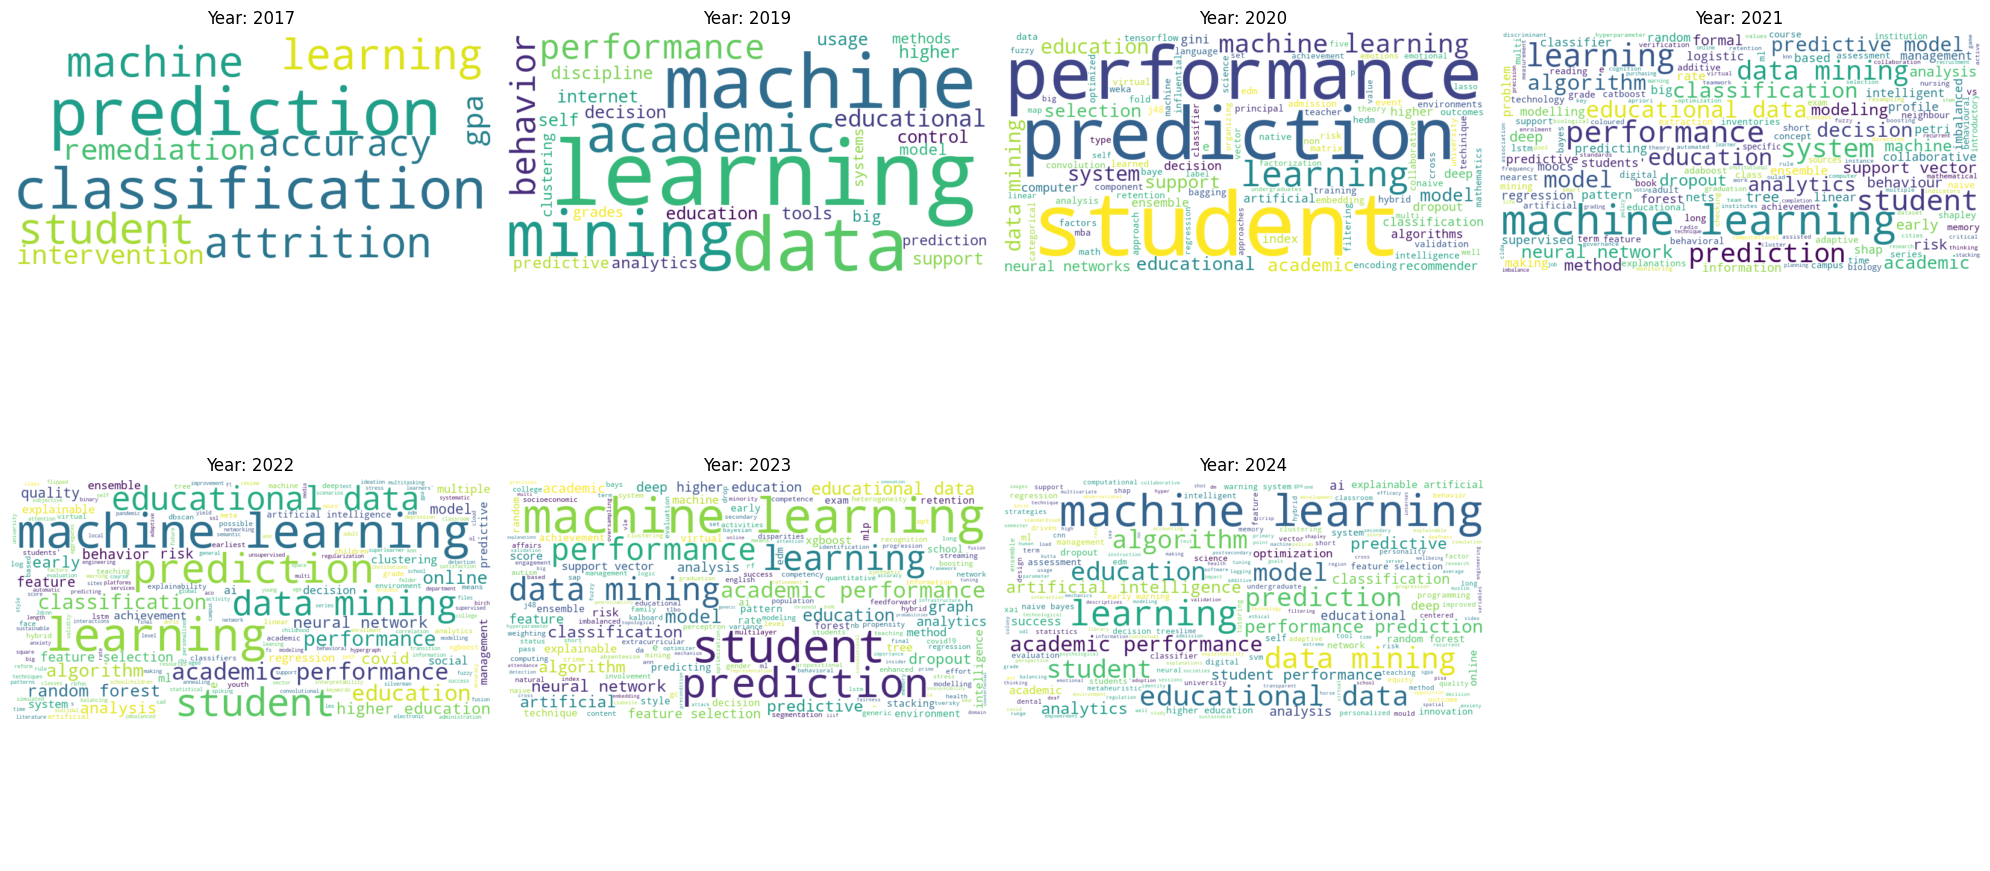

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Assuming 'df' is your DataFrame and it has columns 'Publication Year' and 'Author Keywords'

# Filter out the years 2015 and 2025
filtered_df = df[~df['Publication Year'].isin([2015, 2025])]

# Group data by 'Publication Year' and concatenate all author keywords for each year
year_keywords_dict = filtered_df.groupby('Publication Year')['Author Keywords'].apply(lambda x: ' '.join(x.dropna())).to_dict()

# Determine the number of unique years for subplot layout
num_years = len(year_keywords_dict)
rows = 2
cols = (num_years + 1) // 2  # Calculate the number of columns needed

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate word cloud for each year and plot in the corresponding subplot
for i, (year, keywords) in enumerate(sorted(year_keywords_dict.items())):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Year: {year}')
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

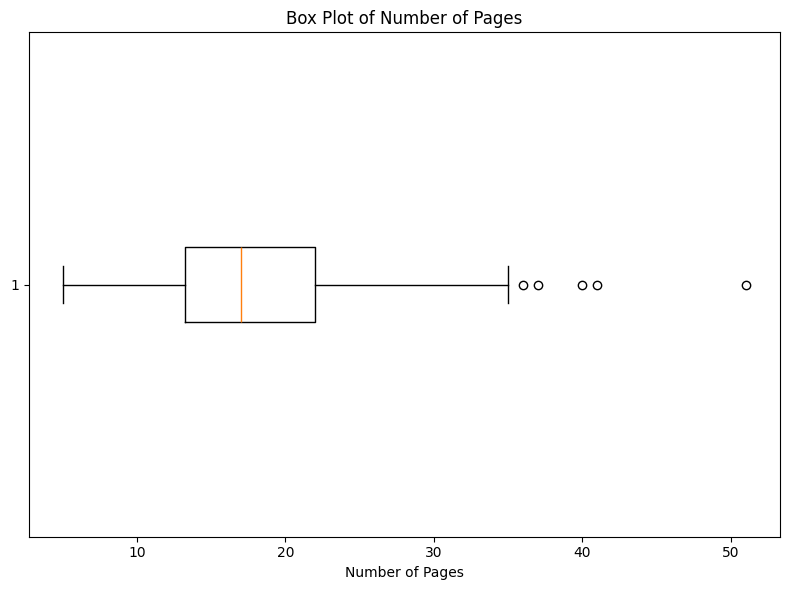

In [12]:
import matplotlib.pyplot as plt

# Create a boxplot for the 'Number of Pages' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Number of Pages'].dropna(), vert=False)
plt.title('Box Plot of Number of Pages')
plt.xlabel('Number of Pages')
plt.tight_layout()
plt.show()


In [13]:
#neki o wos index

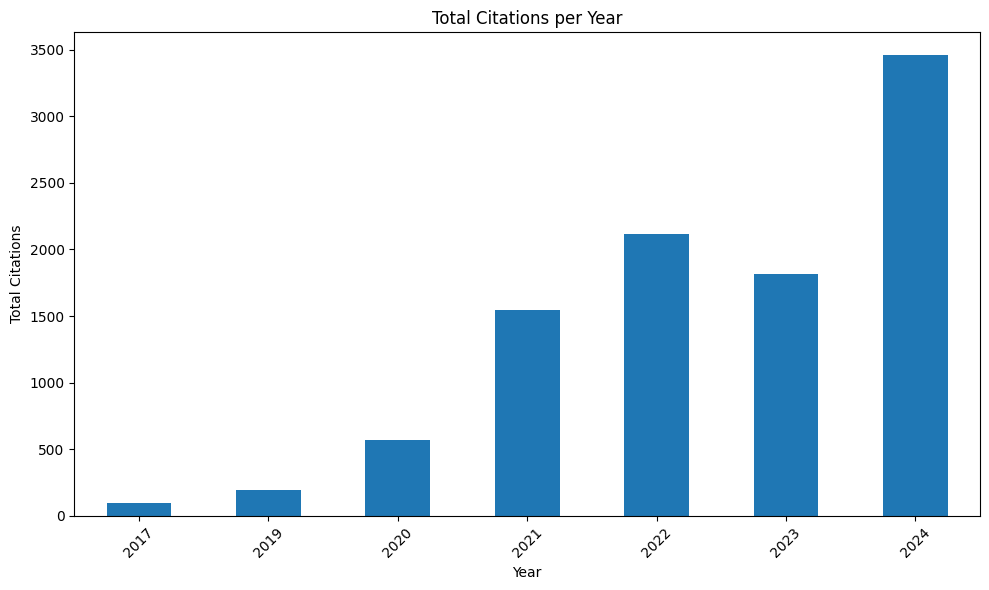

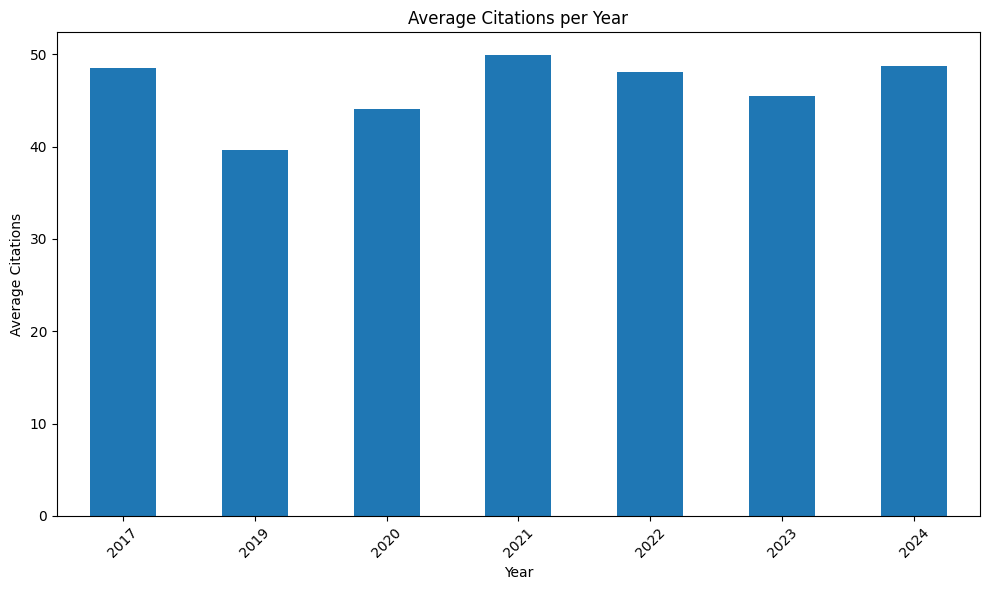

In [14]:

# Grouping by 'Publication Year' and calculating the sum of citations per year
citations_per_year = df.groupby('Publication Year')['Cited Reference Count'].sum()

# Plotting the citations per year
plt.figure(figsize=(10, 6))
citations_per_year.plot(kind='bar')
plt.title('Total Citations per Year')
plt.xlabel('Year')
plt.ylabel('Total Citations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: If you want to calculate the average citations per year instead
average_citations_per_year = df.groupby('Publication Year')['Cited Reference Count'].mean()

# Plotting the average citations per year
plt.figure(figsize=(10, 6))
average_citations_per_year.plot(kind='bar')
plt.title('Average Citations per Year')
plt.xlabel('Year')
plt.ylabel('Average Citations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Regression equation: y = 0.45x + -854.41
R^2: 0.00
Mean Squared Error: 435.50


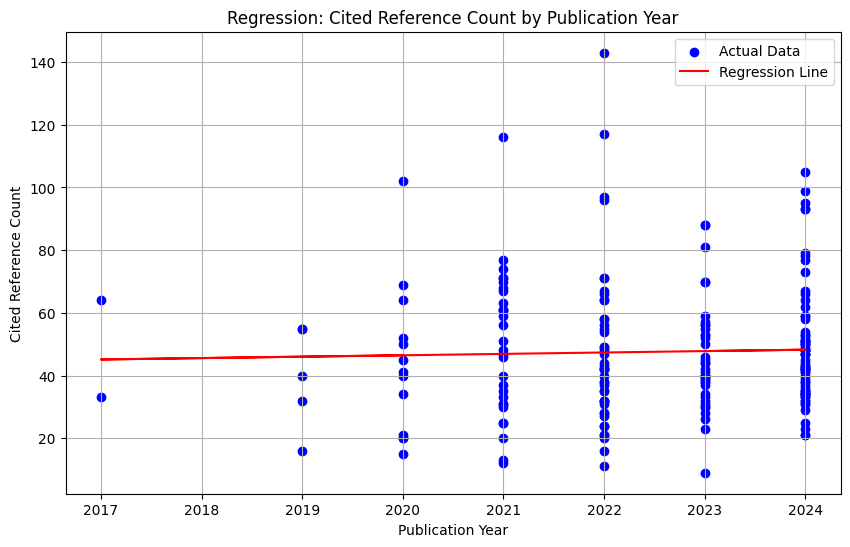

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Regression analysis: 'Cited Reference Count' by 'Publication Year'
X = df[['Publication Year']].values
y = df['Cited Reference Count'].values

# Fit the regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Regression output
slope = regression_model.coef_[0]
intercept = regression_model.intercept_
predictions = regression_model.predict(X)
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print(f"Regression equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.title('Regression: Cited Reference Count by Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Cited Reference Count')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
df_most_citations = df.nlargest(10, 'Cited Reference Count')

# Output the new DataFrame
#print("Articles with the highest 'Cited Reference Count':")
df_most_citations= df_most_citations[['Article Title', 'Cited Reference Count', 'Abstract', "Author Keywords", "Publisher", "Publication Year", "WoS Categories"]]

In [17]:
df_most_citations.head()
df_most_citations.to_excel('output.xlsx', index=False)